# **학업 일지**


#### 오늘의 한마디  

** 함수를 사용할 때 시간, 공간적으로 Profiling하는 습관을 들여야 한다.**

## 1. 강의 정리

#### *파이썬의 자료구조 및 시간, 공간 효율의 중요성 *

#### 1.1 자료구조

- Tuple  
데이터가 하나일 때 tuple 객체를 dynamic typing하려면 (1,) 와 같이 콤마를 넣어야 한다.

- Set 
hash함수를 쓰기때문에 시간복잡도가 O(1)을 가진다. 데이터의 유무를 식별할 때 많이 쓴다.
update, discard, union, intersection, difference

- collection 모듈  
    - deque : linked list 
    데이터가 index로 결정되는 list와 다르게 각 데이터마다 다음데이터의 주소값을 가지는 정보를 가진다. 그래서 rotate메서드와 sort 메서드에 적합하다.

    - Counter : 객체의 각 데이터의 개수를 dict 형식으로 만들어주는 class  
    집합의 and, or연산과 각 데이터 항목을 +나 -로 계산 할 수 있다.

#### 1.2 유용한 함수 및 파이썬 문법

- List comprehension  

In [22]:
# list comprehension으로 삼항 연산까지 가능하므로 일반적인 경우에 map을 대체한다.
a = [(i,j) if i!=j else 'x' for i in range(5) for j in range(2,7) ]
print(a)

[(0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), 'x', (2, 3), (2, 4), (2, 5), (2, 6), (3, 2), 'x', (3, 4), (3, 5), (3, 6), (4, 2), (4, 3), 'x', (4, 5), (4, 6)]


In [6]:
# 2차원 행렬을 초기화 할때는 뒤 for문부터 시작하므로 for문의 순서에 유의해야 한다.
a = [[(i,j) for i in range(5)] for j in range(5,10)]
print(a)

[[(0, 5), (1, 5), (2, 5), (3, 5), (4, 5)], [(0, 6), (1, 6), (2, 6), (3, 6), (4, 6)], [(0, 7), (1, 7), (2, 7), (3, 7), (4, 7)], [(0, 8), (1, 8), (2, 8), (3, 8), (4, 8)], [(0, 9), (1, 9), (2, 9), (3, 9), (4, 9)]]


- Asterisk의 사용법  

함수의 argument는 4가지로 정리할 수 있다.  
1. Keyword-argument: 변수 명만 적어준다.  
2. Default-argument: 변수 명과 Default값을 적어준다. *주의점 : keyword-argument 뒤에 작성해야한다.  
3. Variable-length argument : *args 를 적어주고 여러가지 값을 tuple형태로 받아들인다.  
4. Keyword variable-length argument : **kargs 를 적어주고 여러가지 값을 dict형태로 받아들인다.

In [23]:
# 변수 명만 적어주는 경우
def argument_check(a):
    print(a)
argument_check(10)

10


In [26]:
# Default값을 적어주는 경우
def argument_check2(a, b=5):
    print(a, b)
argument_check2(5)
argument_check2(5,10)

5 5
5 10


In [29]:
# *args를 적어주는 경우
def argument_check3(a, b=5, *args):
    print(a,b,args)
argument_check3(1,10,5,6,7)

1 10 (5, 6, 7)


In [2]:
# **kargs를 적어주는 경우
def argument_check4(a, b=5, *args, **kargs):
    print(a,b,args, kargs)
argument_check4(5,4,1,4,5,first=2,second=5,third=6)

5 4 (1, 4, 5) {'first': 2, 'second': 5, 'third': 6}


- Generator vs Iterator
    - Iterator : 내부적 구현으로 __iter__과 __next__를 활용한다.  
    공간적으로 메모리를 적게 차지하기 때문에 많이 익숙해져야 한다.

In [33]:
def generator_list(value):
    result = []
    for i in range(value):
        yield i
print(generator_list(5))
for j in generator_list(5):
    print(j)

<generator object generator_list at 0x0000020C80F0C9E0>
0
1
2
3
4


역시 generator comprehension도 존재한다.  


#### 1.3 시간, 공간의 효율성

- 시간 효율성  
cProfile 내장 모듈을 사용한다.

In [11]:
def time_check():
    a = [i for i in range(60000000)]
    return a

In [12]:
import cProfile
cProfile.run('time_check()')

         5 function calls in 4.312 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    3.804    3.804 <ipython-input-11-acc950406be3>:1(time_check)
        1    3.804    3.804    3.804    3.804 <ipython-input-11-acc950406be3>:2(<listcomp>)
        1    0.508    0.508    4.312    4.312 <string>:1(<module>)
        1    0.000    0.000    4.312    4.312 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




- 공간 효율성  
momory_profiler 외부 모듈의 profile 데코레이터를 사용한다. 

In [20]:
import memory_profiler
@memory_profiler.profile(precision=4)
def memory_check2():
    a = [i for i in range(500000)]
    return

`Jupyter 환경에서는 물리주소를 받아들이는데 적합하지 않아 실행되지 않는다.`

실제실행 결과
```
Filename: c:\Users\JCdata\workspace\Test_folder\test.py

Line #    Mem usage    Increment  Occurences   Line Contents
============================================================
     4  58.6289 MiB  58.6289 MiB           1   @memory_profiler.profile(precision=4)
     5                                         def solution1():
     6  58.7500 MiB   0.1211 MiB        5003       a = [i*i for i in range(5000)]
     7  58.7500 MiB   0.0000 MiB           1       return a
```

## 2. 피어 세션 정리

#### 2.1 AI 예습

- 인공지능부터 CNN까지 전체 개요 발표 및 실제 코드 리뷰  
    - 발표에 대한 보고서 작성  
    `my comment : 발표할 때 모든 정보들이 유기적으로 짜여있도록 큰 틀을 작성하여야 할 것 같다.
    양식 작성하자.`


#### 2.2 원하는 진로를 잡고 논문 공부

오늘 AI 수학 서적을 읽고 (Mathematics for Machine learning - Marc Peter Deisenroth)
내일 중 논문 검색할 예정이다.

- 정규 표현식에 대한 개요와 실제 사용 예시  
`. ^ $ * + ? { } [ ] \ | ( )`의 역할 활용할 수 있도록 연습해야 한다.


## 3. 진행중인 공부 및 신규 공부 목록

- 진행중인 공부  

    - Jupyter Notebook 심화 공부  
    - Vim 에디터 연습  
    - 진로 관련 논문 1개 정해서 100프로 이해할 때까지 읽기

- 신규 공부 목록  

    - 자료구조 메모리 부분 공부하기 
    - AI 기본 수학 : Mathematics for Machine learning - Marc Peter Deisenroth
    - 정규 표현식 공부
    

- 완료한 공부  

    - del() 함수와 pop()함수는 index를 기준으로 데이터를 처리하고 remove()함수는 value를 기준으로 데이터 처리를 한다.  
> https://docs.python.org/3/tutorial/datastructures.html  
    - Jupyter Notebook 작성 기본기 완료, 심화단계로 넘어갈 것.

## 4. 감사한 일

- tip게시판에 pythonic code에 대해 영상 올려준 이동현 캠퍼에게 감사합니다. 
- 정규표현식을 배우고 싶었는데 전체적으로 정리해주신 배새봄님에게 감사합니다.  
- 언더바(`_`)의 사용법을 가르쳐 주신 이주남님에게 감사합니다.

## 5. 자필 강의노트 및 인용

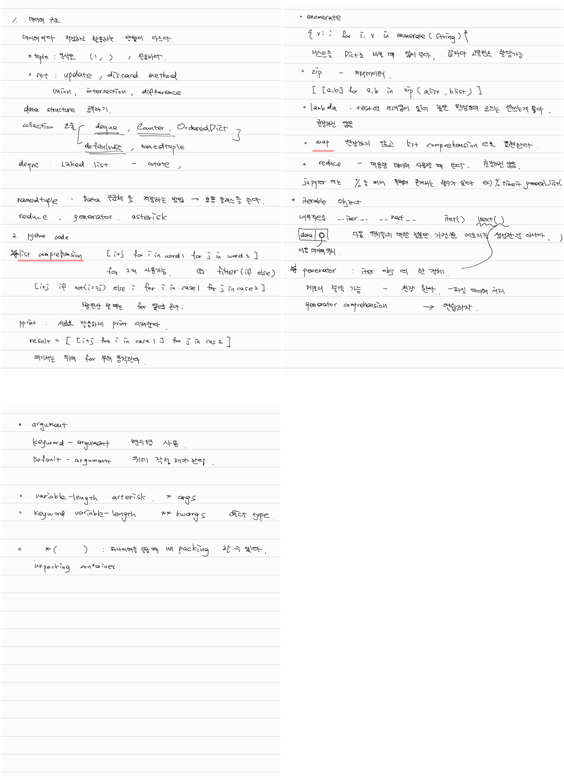

In [21]:
from IPython.display import Image
Image("C:/Users/JCdata/Pictures/0120_Lecture.png")